In [1]:
import pandas as pd
import numpy as np

In [4]:
df=pd.read_csv(r"C:\Users\KISHORE\Desktop\CHICAGO\cleaned_data.csv")

In [4]:
df.shape

(548917, 17)

In [5]:
df.head()

,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,FBI Code,Year,Updated On,Latitude,Longitude,CDate,Time
0,2007-08-25 09:22:18,074XX N ROGERS AVE,560,ASSAULT,SIMPLE,OTHER,False,False,2422,24,08A,2007,2015-08-17 15:03:40,42.005582,-87.676580,2007-08-25,1900-01-01 09:22:18
1,2021-05-24 15:06:00,020XX N LARAMIE AVE,110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,2515,25,01A,2021,2023-11-18 15:39:49,41.917838,-87.755969,2021-05-24,1900-01-01 15:06:00
2,2021-06-26 09:24:00,062XX N MC CORMICK RD,110,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,False,1711,17,01A,2021,2023-11-18 15:39:49,41.995219,-87.713355,2021-06-26,1900-01-01 09:24:00
3,2023-11-09 07:30:00,019XX W BYRON ST,620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,1922,19,5,2023,2023-11-18 15:39:49,41.952345,-87.677975,2023-11-09,1900-01-01 07:30:00
4,2023-11-12 07:59:00,086XX S COTTAGE GROVE AVE,454,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",SMALL RETAIL STORE,True,False,632,6,08B,2023,2023-12-09 15:41:24,41.737751,-87.604856,2023-11-12,1900-01-01 07:59:00


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548917 entries, 0 to 548916
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Date                  548917 non-null  object 
 1   Block                 548917 non-null  object 
 2   IUCR                  548917 non-null  object 
 3   Primary Type          548917 non-null  object 
 4   Description           548917 non-null  object 
 5   Location Description  548917 non-null  object 
 6   Arrest                548917 non-null  bool   
 7   Domestic              548917 non-null  bool   
 8   Beat                  548917 non-null  int64  
 9   District              548917 non-null  int64  
 10  FBI Code              548917 non-null  object 
 11  Year                  548917 non-null  int64  
 12  Updated On            548917 non-null  object 
 13  Latitude              548917 non-null  float64
 14  Longitude             548917 non-null  float64
 15  

In [9]:
df.columns

Index(['Date', 'Block', 'IUCR', 'Primary Type', 'Description',
       'Location Description', 'Arrest', 'Domestic', 'Beat', 'District',
       'FBI Code', 'Year', 'Updated On', 'Latitude', 'Longitude', 'CDate',
       'Time'],
      dtype='object')

In [15]:
df['Date'] = pd.to_datetime(df['Date'])
df['CDate'] = pd.to_datetime(df['CDate'])
df['Year'] = df['CDate'].dt.year
df['Month'] = df['CDate'].dt.month

CRIME TYPE:

Inference : Through the below graph plotted, we can conclude that most stakes of the crime type imvolve theft related crimes, so they can be reduced if people are alarmed about this pattern and advised to improve the safeness of their property

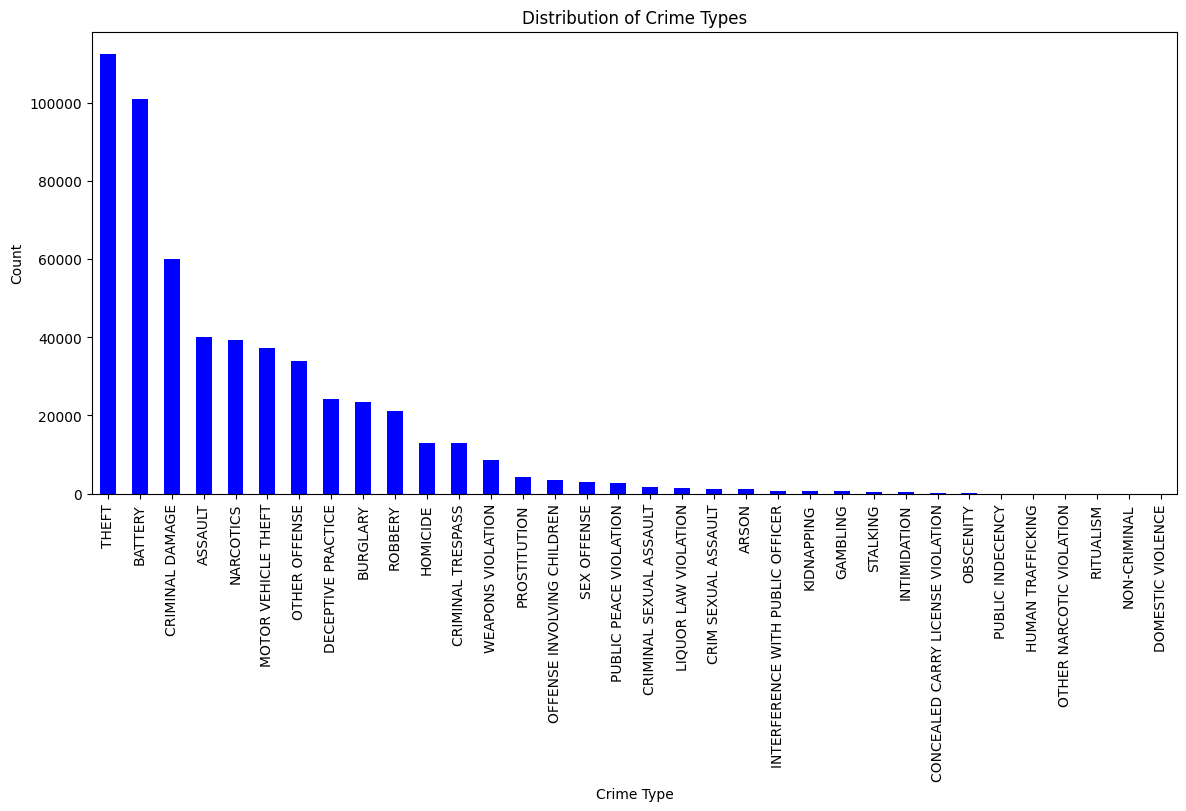

In [18]:
crime_counts = df['Primary Type'].value_counts()

crime_counts.plot(kind='bar', color='blue', figsize=(14,6))
plt.title("Distribution of Crime Types")
plt.xlabel("Crime Type")
plt.ylabel("Count")
plt.show()

MONTHLY ANALYSIS:

Inference : Through the below graph plotted, we can conclude that more crimes occur in the first half of the year , the WINTER (JAN-MAR) and SPRING (APR-MAY) to be more specific.It would be better if the police department improve their patrol during thee seasons

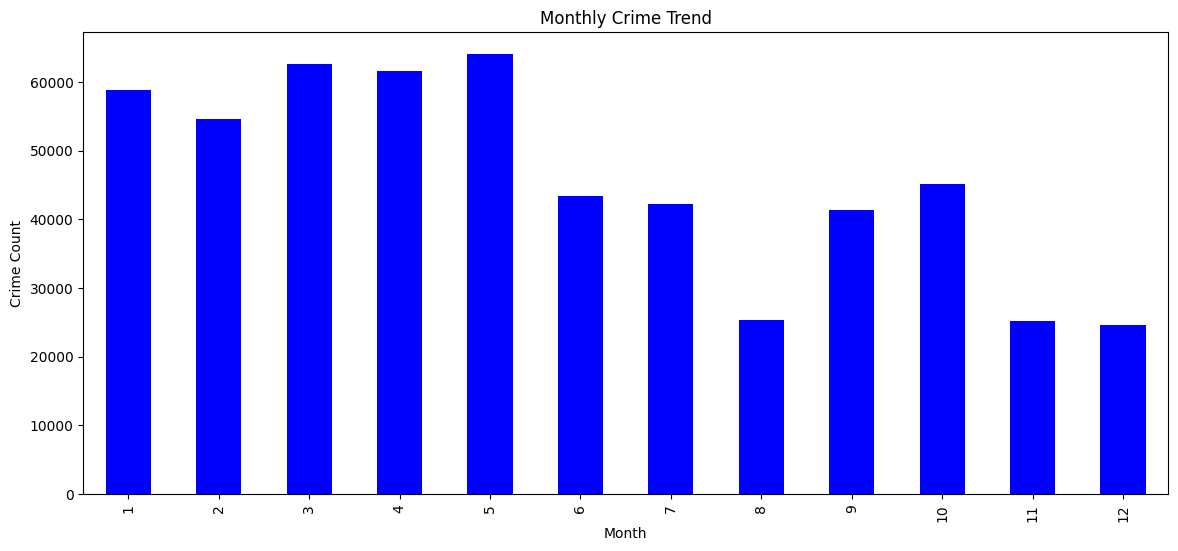

In [17]:
monthly_crimes = df['Month'].value_counts().sort_index()

monthly_crimes.plot(kind='bar', color='blue', figsize=(14, 6))
plt.title("Monthly Crime Trend")
plt.xlabel("Month")
plt.ylabel("Crime Count")
plt.show()


HOURLY TREND:

Inference : Through the below graph plotted, we can conclude that more crimes occur in the dark .We could reduce the crime by strengthening the patrol at the night hours and advised to the citizend to reduce activities duing the late hours of the day

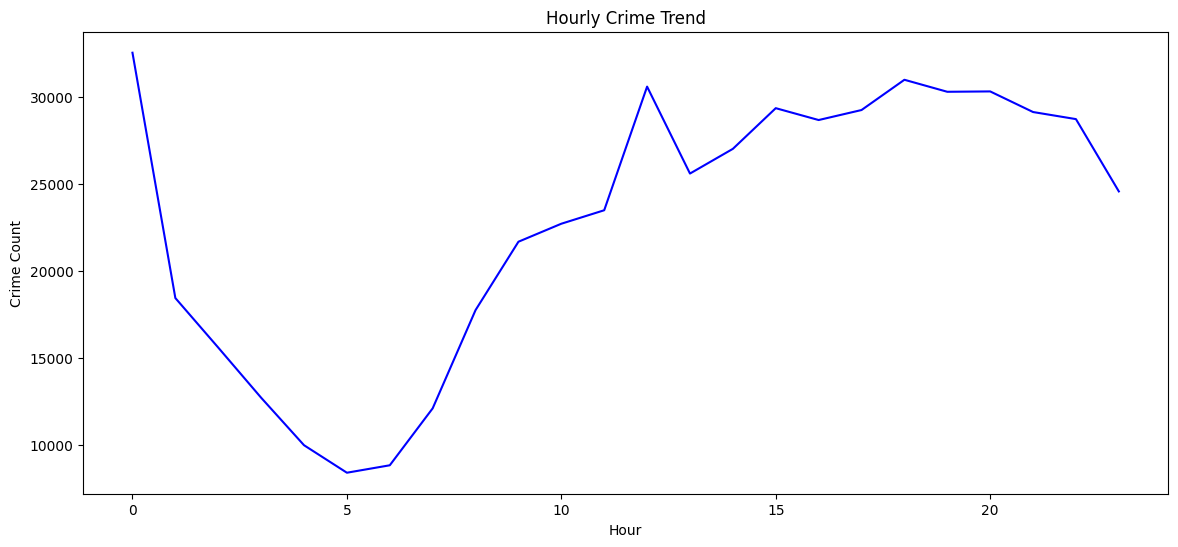

In [19]:
df['Hour'] = df['Date'].dt.hour
hourly_crimes = df['Hour'].value_counts().sort_index()

hourly_crimes.plot(kind='line',color='blue', figsize=(14, 6))
plt.title("Hourly Crime Trend")
plt.xlabel("Hour")
plt.ylabel("Crime Count")
plt.show()

DAY ANALYSIS:

Inference: Through this graph we can concluded that most crimes occur on Fridays and Wednesdays ,which may occur due to many reasons. The police dept should narrow down the underlying causes for crimes happening on those and alert citizens to be aware of it

C:\Users\KISHORE\AppData\Local\Temp\ipykernel_988\1041309796.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_counts.index, y=day_counts.values, palette='viridis')


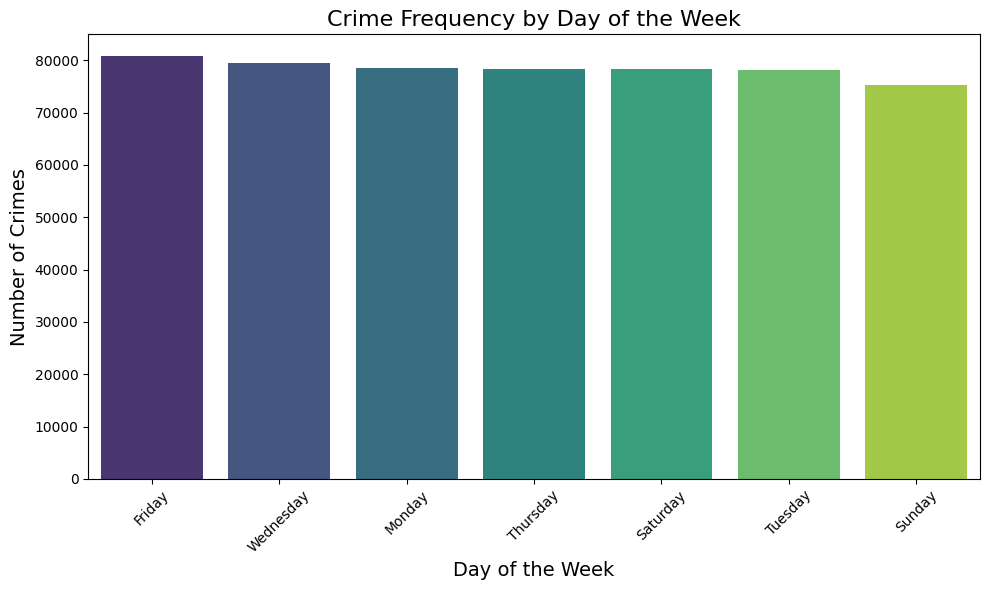

In [37]:
df['DayOfWeek'] = df['Date'].dt.day_name()
day_counts = df['DayOfWeek'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=day_counts.index, y=day_counts.values, palette='viridis')
plt.title('Crime Frequency by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Number of Crimes', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

ARREST ANALYSIS:

Inference : through this graph we can conclude that a very high % of offenders are not arrested by the police which is a high intense concern which needs immediate attention and sorted 

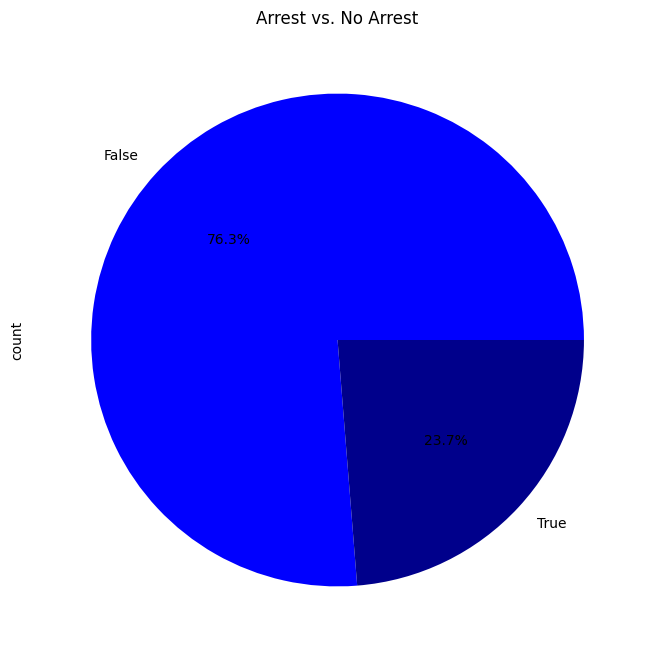

In [30]:
arrest_counts = df['Arrest'].value_counts() * 100

arrest_counts.plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'darkblue'], figsize=(8, 8))
plt.title("Arrest vs. No Arrest")
plt.show()

TOP LOCATIONS:

Inference: Withe the graph plotted, we come to know that maximum crimes ccur in the streets,citizens could be advised to travel in less crowded streets.Citizen as individuals could work Impoving the security of their household to reduce the crimes occuring in residents

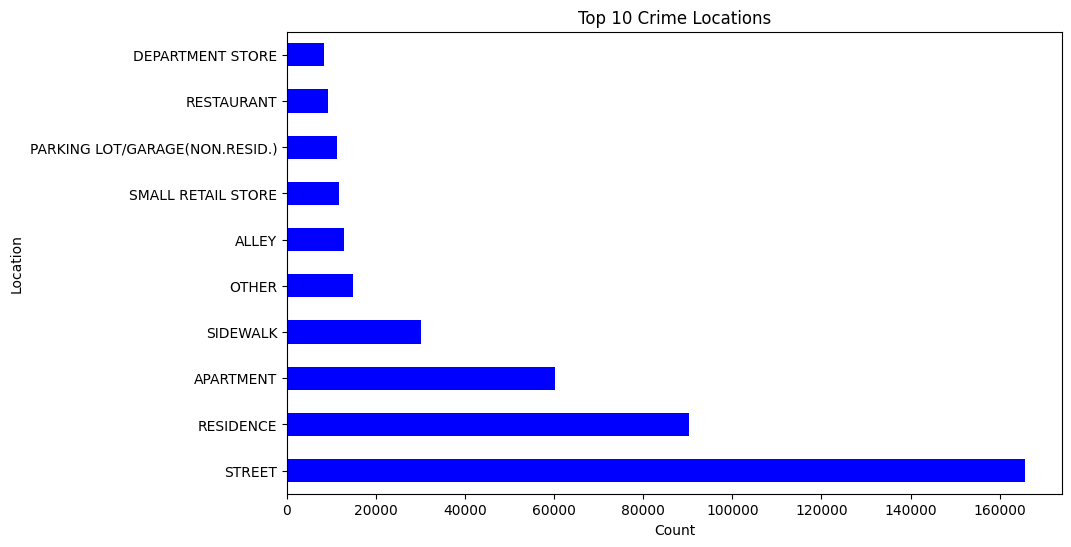

In [24]:
top_locations = df['Location Description'].value_counts().head(10)

top_locations.plot(kind='barh', color='blue', figsize=(10, 6))
plt.title("Top 10 Crime Locations")
plt.xlabel("Count")
plt.ylabel("Location")
plt.show()


SEVERITY ALONG WITH ARREST:

Inference: Through this graph ,of the severe crimes happening,only less criminals are arrested.So,the police dept of Chicago should focus on their arresting rate,mainly on tose who've commited severe crimes

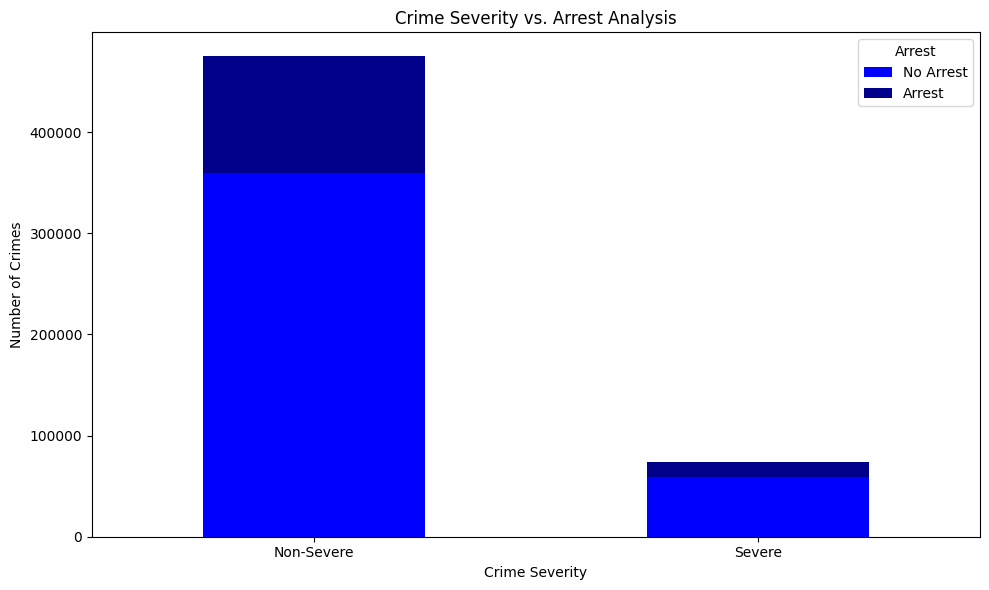

In [39]:
df['Severity'] = df['Primary Type'].apply(lambda x: 'Severe' if x in ['HOMICIDE', 'ASSAULT', 'ROBBERY'] else 'Non-Severe')
arrest_counts = df.groupby(['Severity', 'Arrest']).size().unstack().fillna(0)

arrest_counts.plot(kind='bar', stacked=True, color=['blue','darkblue'], figsize=(10, 6))
plt.title('Crime Severity vs. Arrest Analysis')
plt.xlabel('Crime Severity')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=0)
plt.legend(['No Arrest', 'Arrest'], title='Arrest')
plt.tight_layout()
plt.show()


ARREST TO CRIME TYPE RATIO :

Inference: Here,the graphs with higher peaks indicate potentially more effective enforcement or more arrests made for those types and vice versa.This data can be shared with the police dept and enforced to stay active on crime with lower peaks

C:\Users\KISHORE\AppData\Local\Temp\ipykernel_988\320328991.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=arrest_to_crime_ratio.index, y=arrest_to_crime_ratio.values, palette='viridis')


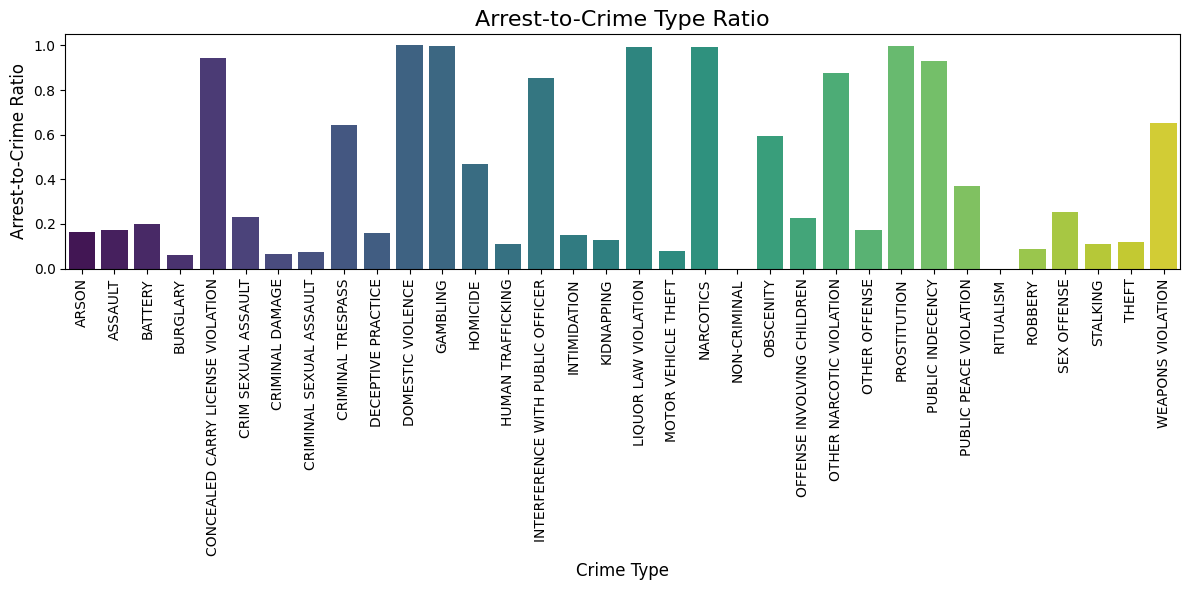

In [40]:
crime_counts = df.groupby('Primary Type')['Arrest'].size()  # Total number of crimes per type
arrest_counts = df.groupby('Primary Type')['Arrest'].sum()  # Total number of arrests per type
arrest_to_crime_ratio = arrest_counts / crime_counts

plt.figure(figsize=(12, 6))
sns.barplot(x=arrest_to_crime_ratio.index, y=arrest_to_crime_ratio.values, palette='viridis')
plt.xticks(rotation=90)
plt.title('Arrest-to-Crime Type Ratio', fontsize=16)
plt.xlabel('Crime Type', fontsize=12)
plt.ylabel('Arrest-to-Crime Ratio', fontsize=12)
plt.tight_layout()
plt.show()

RELATION BETWEEN DOMESTIC INCIDENTS AND ARRESTS:

Inference:Through this graph,we have plotted the Relationship Between Domestic Incidents and Arrests,where only less numbe of domestic offender are arreted,this should be taken care of,also the police should put their focus on the large number of criminal not in the arrested list which being a major concern and needed to be taken care of

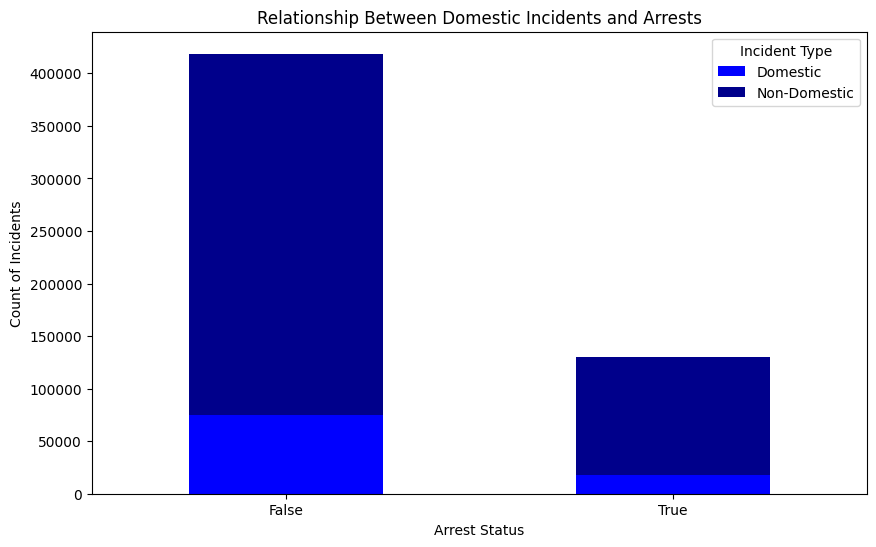

In [ ]:
domestic_arrests = df[df['Domestic'] == True]['Arrest'].value_counts()
non_domestic_arrests = df[df['Domestic'] == False]['Arrest'].value_counts()

domestic_arrest_df = pd.DataFrame({
    'Domestic': domestic_arrests,
    'Non-Domestic': non_domestic_arrests
}).fillna(0)  #Combining Here

domestic_arrest_df.plot(kind='bar', stacked=True, figsize=(10, 6), color=['blue', 'darkblue'])
plt.title('Relationship Between Domestic Incidents and Arrests')
plt.xlabel('Arrest Status')
plt.ylabel('Count of Incidents')
plt.xticks(rotation=0)
plt.legend(title='Incident Type', labels=['Domestic', 'Non-Domestic'])
plt.show()
